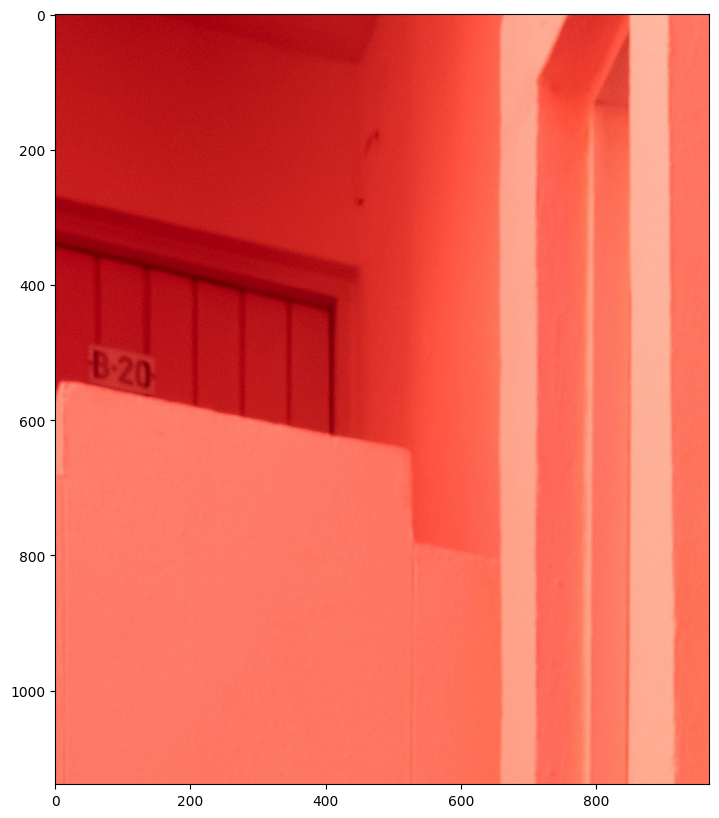

color : [255 106  91] , fitness : 945.1977750577697
color : [255 127 108] , fitness : 1486.9204761890874
color : [254 168 145] , fitness : 996.5587441567818
color : [251 118  83] , fitness : 1996.7288441203157
color : [251  81  64] , fitness : 2628.418716756583


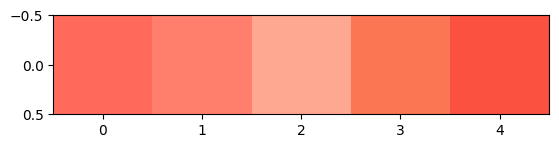

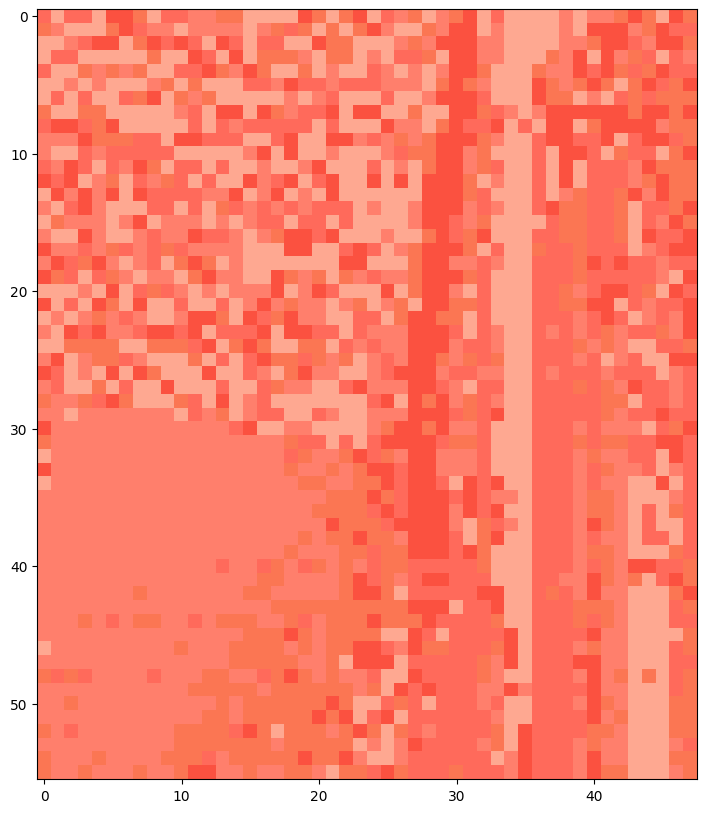

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

class Bee:
    def __init__(self, position, image):
        self.position = position
        self.fit = fitness(image, position)

def load_image(path):
    return img.imread(path)

def plot_image(image, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.show()

def fitness(image, position):
    r, g, b = position # position is a RGB value between (0,0,0)-(255,255,255)
    distances = np.sqrt(np.sum((image - [r, g, b]) ** 2, axis=2))
    return np.sum(np.min(distances, axis=1))

def ABC_algorithm(image, n_bees, n_iter, fit_limit):

    # Initializing the population
    height, width, channels = image.shape

    bees = [Bee(image[(np.random.randint(0, height)), (np.random.randint(0, width))], image) for _ in range(n_bees)]
    best_bee = min(bees, key=lambda bee:bee.fit)

    for _ in range(n_iter):
        for bee in bees:
            partner = random.choice(bees)
            new_pos = bee.position + np.random.uniform(-0.01, 0.01, size=3)*(bee.position - partner.position)
            new_pos_fit = fitness(image, new_pos)

            if new_pos_fit < bee.fit:
                bee.position, bee.fit = new_pos, new_pos_fit
                if new_pos_fit < best_bee.fit:
                    best_bee = bee
            else:
                if random.random() < (1 / (1 + np.exp((bee.fit - new_pos_fit) / 0.01))):
                    bee.position, bee.fit = new_pos, new_pos_fit

        for bee in bees:
            if bee.fit > fit_limit:
                bee.position = image[(np.random.randint(0, height)), (np.random.randint(0, width))]
                bee.fit = fitness(image, bee.position)

    return best_bee.position, best_bee.fit

def find_closest_color(pixel, colors):
  min_distance = float('inf')
  closest_color = None
  colors = colors.reshape(-1,3)
  for col in colors:
    r, g, b = tuple(col)
    distance = np.sqrt(np.sum((pixel - [r, g, b])**2))
    if min_distance > distance:
      min_distance = distance
      closest_color = col

  return closest_color

def quantize_image(image, colors):
  quantized_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      pixel = image[i][j]
      closest_color = find_closest_color(pixel, colors)
      quantized_image[i][j] = closest_color

  return quantized_image

def generate_pattern(image, stitch_size=10):
  num_stitches_width = image.shape[1] // stitch_size
  num_stitches_height = image.shape[0] // stitch_size
  pattern = np.empty((num_stitches_height,num_stitches_width,3))
  for i in range(num_stitches_height):
      for j in range(num_stitches_width):
          stitch_color = image[i*stitch_size][j*stitch_size]
          pattern[i][j] = stitch_color
  return pattern.astype("uint8")

def main():
  image = load_image("/content/test.jpg")
  plot_image(image)

  colors = []
  for i in range(5):
    col, fit = ABC_algorithm(image, 10, 10, 10)
    print("color :", col, ", fitness :", fit)
    colors.append(col)

  colors = np.expand_dims(np.uint8(np.array(colors)),axis=0)
  plt.imshow(colors)
  plt.show()

  quantized = quantize_image(image, colors)
  pattern = generate_pattern(quantized, stitch_size=20)
  plot_image(pattern)

if __name__ == "__main__":
  main()